In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/msorokina/Downloads/KAG_conversion_data.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [6]:
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [7]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

## We now know that this dataset contains 3 advertising campaigns from XYZ company ##
Part 1: What questions can be asked in the analysis: 
- Which campaign had the most impressions
- Calculate CTR (click-through rate) 
- Calculate CR1 (conversion rate for total conversion)
- Calculate CR2 (conversion rate for approved conversion)
- Calculate CPC (cost per click)
- Calculate CPO1 (cost per total conversion)
- Calculate CPO2 (cost per approved conversion)
- Which campaign had the best conversion rate (description of target audience: gender, age)

## Let's calculate the absolute values by campaign ##

                 Impressions  Clicks         Spent
xyz_campaign_id                                   
916                   482925     113    149.710001
936                  8128187    1984   2893.369999
1178               204823716   36068  55662.149959


<Axes: xlabel='xyz_campaign_id'>

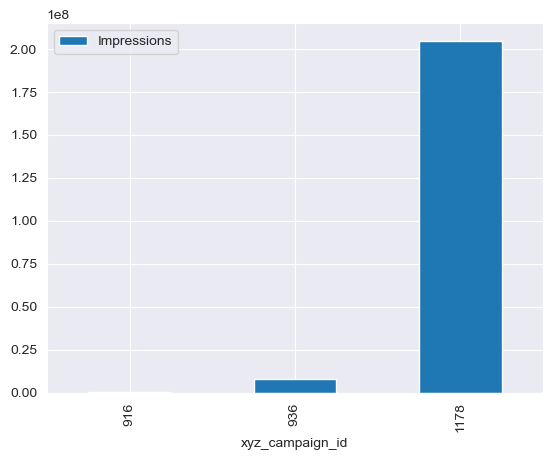

In [8]:
top_1_by_impressions = df.groupby(['xyz_campaign_id']).agg({'Impressions': 'sum', 'Clicks': 'sum', 'Spent': 'sum'})
print(top_1_by_impressions)
top_1_by_impressions.plot(kind='bar', y='Impressions')

 Let's add a clear view to perceive the ratios by campaigns

In [10]:
top_1_by_impressions['Impressions_%']=top_1_by_impressions['Impressions']/(top_1_by_impressions['Impressions'].sum())*100
top_1_by_impressions['Impressions_%']

xyz_campaign_id
916      0.226263
936      3.808276
1178    95.965461
Name: Impressions_%, dtype: float64

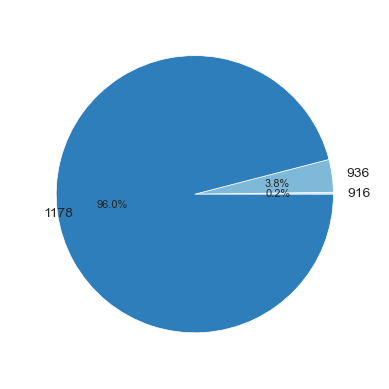

In [11]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(top_1_by_impressions)))
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(top_1_by_impressions['Impressions_%'], 
                                   labels=top_1_by_impressions.index,
                                   colors=plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(top_1_by_impressions))),
                                   autopct='%1.1f%%',
                                   radius=3, 
                                   center=(4, 4),
                                   wedgeprops={"linewidth": 0.5, "edgecolor": "white"}, 
                                   frame=False)

ax.set(xlim=(0, 8),
       ylim=(0, 8) )

for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontsize(8)

plt.show()

## As we can see advertising campaign 1178 was shown to users most often, exactly 96% of the time in second place campaign 936 with 3.8%
Let's group our metrics
Now let's find out CTR (click-through rate) for each campaign clicks/impression,
CR (conversion rate),
CPC (cost per click),
CPO (cost per order)


In [12]:
df_grouped = df.groupby(['xyz_campaign_id']).agg({'Impressions':'sum', 'Clicks':'sum', 'Total_Conversion':'sum', 'Approved_Conversion':'sum', 'Spent':'sum'})
df_grouped['CTR']=df_grouped.Clicks/df_grouped.Impressions
df_grouped['CR1']=df_grouped.Total_Conversion/df_grouped.Clicks
df_grouped['CR2']=df_grouped.Approved_Conversion/df_grouped.Clicks
df_grouped['CPC']=df_grouped.Spent/df_grouped.Clicks
df_grouped['CPO1']=df_grouped.Spent/df_grouped.Total_Conversion
df_grouped['CPO2']=df_grouped.Spent/df_grouped.Approved_Conversion

df_grouped

,Impressions,Clicks,Total_Conversion,Approved_Conversion,Spent,CTR,CR1,CR2,CPC,CPO1,CPO2
xyz_campaign_id,,,,,,,,,,,
916,482925,113,58,24,149.710001,0.000234,0.513274,0.212389,1.324867,2.581207,6.237917
936,8128187,1984,537,183,2893.369999,0.000244,0.270665,0.092238,1.458352,5.388026,15.810765
1178,204823716,36068,2669,872,55662.149959,0.000176,0.073999,0.024177,1.543256,20.855058,63.832741


In [ ]:
#done цена за 1000 показов
#done отфильтровать кампании без сделок, сортировка по тратам
#todo группировка - затем расчет СЕR и тд
#done смоделировать стоимость продаж в результате апрувд конверсии и расчитать ROI

When evaluating CPO, advertising campaign 936 turned out to be the most effective. 
let's find out more

In [13]:
df_grouped['Cost_per_1000'] = df_grouped.Spent / (df_grouped.Impressions / 1000)
df_grouped[['Impressions', 'Spent', 'CTR', 'CPC', 'Cost_per_1000']]

,Impressions,Spent,CTR,CPC,Cost_per_1000
xyz_campaign_id,,,,,
916,482925,149.710001,0.000234,1.324867,0.310007
936,8128187,2893.369999,0.000244,1.458352,0.355967
1178,204823716,55662.149959,0.000176,1.543256,0.271756


We now know the cost per 1000 impressions and for campaign 1178 the minimum cost per 1000 impressions compared to the others is 

Graph the CPC data


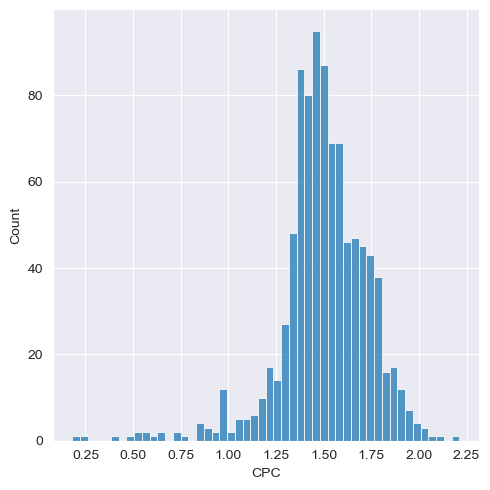

In [14]:
df['CPC']=df.Spent/df.Clicks
sns.displot(df.dropna().CPC, kde=False, bins=50);

The next question is which campaign is the most ineffective?

In [15]:
df_grouped_fb = df.groupby(['xyz_campaign_id', 'fb_campaign_id']).agg({'Impressions':'sum', 'Clicks':'sum', 'Total_Conversion':'sum', 'Approved_Conversion':'sum', 'Spent':'sum'})
df_grouped_fb['Cost_per_1000']= df_grouped_fb.Spent/(df_grouped_fb.Impressions/1000)
df_grouped_fb[df_grouped_fb['Approved_Conversion'] == 0].sort_values('Spent', ascending=False).head(10)

Impressions  Clicks  Total_Conversion  \
xyz_campaign_id fb_campaign_id                                          
1178            144723              1221803     302                 4   
                179956              1114711     224                 6   
936             115485               670539     171                 4   
1178            179978               637549     120                 3   
                144657               588617     119                 2   
                144580               564048      96                 6   
                179944               485369     114                 3   
                144714               460538     111                 3   
                144628               506754      98                 5   
                144679               563400     106                 5   

                                Approved_Conversion       Spent  Cost_per_1000  
xyz_campaign_id fb_campaign_id                                                  
1178            144723                            0  430.019999       0.351955  
                179956                            0  319.000002       0.286173  
936             115485                            0  269.240000       0.401528  
1178            179978                            0  173.880003       0.272732  
                144657                            0  169.919997       0.288677  
                144580                            0  165.880001       0.294088  
                179944                            0  164.640002       0.339206  
                144714                            0  159.439999       0.346204  
                144628                            0  155.359999       0.306579  
                144679                            0  153.640000       0.272701

Above is a selected list of the 10 most expensive and fruitless campaigns 

Now let's try to model the cost of purchases to calculate the return on investment

In [18]:
min_value = 120  
max_value = 1000  

np.random.seed(0) 
random_values = np.random.uniform(min_value, max_value, len(df))
df['Purchase'] = np.where(df['Approved_Conversion'] > 0 , random_values, 0)
 
df   

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CPC,Purchase
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,1.430000,602.955883
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,NaN,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,1.290000,492.816223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,1.421389,410.093019
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,1.471926,465.240667


In [19]:
df_roi = df.groupby(['xyz_campaign_id']).agg({'Impressions':'sum', 'Clicks':'sum', 'Total_Conversion':'sum', 'Approved_Conversion':'sum', 'Spent':'sum', 'Purchase':'sum'})
df_roi['ROI'] = (df_roi.Purchase - df_roi.Spent)/df_roi.Spent * 100

df_roi

,Impressions,Clicks,Total_Conversion,Approved_Conversion,Spent,Purchase,ROI
xyz_campaign_id,,,,,,,
916,482925,113,58,24,149.710001,12597.756191,8314.772651
936,8128187,1984,537,183,2893.369999,96665.392249,3240.927440
1178,204823716,36068,2669,872,55662.149959,216271.257410,288.542767


Now we can conclude that the 916 campaign was indeed the most cost-effective and effective among the others

## Now let's check on which audience the campaign has shown the best effect on 

In [20]:
df['CPC']=df.Spent/df.Clicks
df['CTR']=df.Clicks/df.Impressions
df_pivot_table = df.pivot_table(index=['xyz_campaign_id','gender' ,'age'], values='CTR', aggfunc=sum).sort_values('CTR', ascending=False).head(10)
df_pivot_table

CTR
xyz_campaign_id gender age            
936             F      45-49  0.017522
1178            F      45-49  0.017216
                       40-44  0.013876
                M      45-49  0.013053
                F      30-34  0.012523
936             F      30-34  0.012332
1178            M      35-39  0.011833
                       30-34  0.011405
                F      35-39  0.010899
                M      40-44  0.010576

So, ad campaign 936 on women aged 45 to 49 and campaign 1178 on women aged 45 to 49 and 40 to 44 worked best in terms of CTRs

In [21]:
df['CPO2']=df.Spent/df.Approved_Conversion
filtered_df = df[df['Approved_Conversion'] > 0]

df_grouped_pivoted = filtered_df.pivot_table(columns='xyz_campaign_id', index=['gender' ,'age'], values=['CPC','CPO2'], aggfunc={'CPC': sum, 'CPO2': sum})
df_grouped_pivoted

CPC                          CPO2              \
xyz_campaign_id      916        936         1178   916         936    
gender age                                                            
F      30-34     4.247857  30.669591   92.902377  29.11   92.618334   
       35-39     1.400000  20.404787   54.009037   2.80  117.250000   
       40-44     1.130000  11.237948   50.006300   1.13  120.350001   
       45-49     1.432500  28.387277   54.934223   5.73  477.619998   
M      30-34     5.458571  24.515833  123.746987  14.27   58.325000   
       35-39     4.177500  14.915000   92.569717  10.67   22.010000   
       40-44     2.055000  13.504167   69.779664  10.16   29.600000   
       45-49     1.530000  10.133333   71.670400   1.53   27.570000   

                              
xyz_campaign_id         1178  
gender age                    
F      30-34     2744.885498  
       35-39     2683.065658  
       40-44     2651.612221  
       45-49     4507.228582  
M      30-34     2246.729619  
       35-39     2402.463330  
       40-44     2196.581667  
       45-49     3229.536140

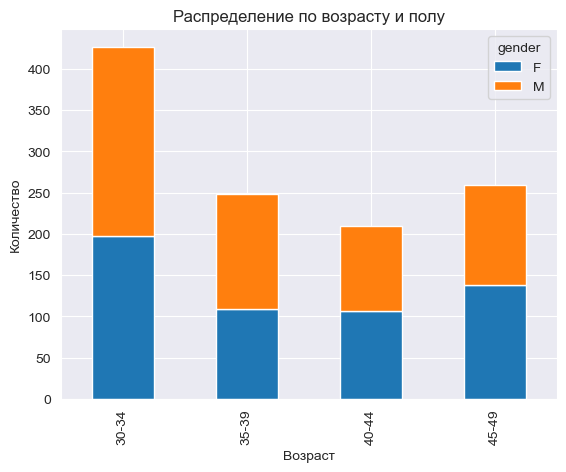

In [22]:
df.groupby(['age', 'gender']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Распределение по возрасту и полу')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

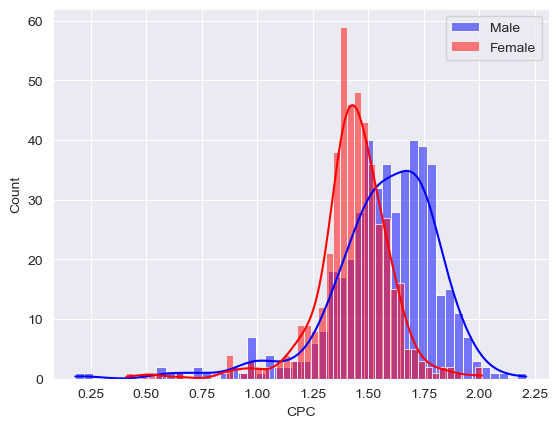

In [23]:
data_m = df[df['gender'] == 'M'].dropna().CPC
data_f = df[df['gender'] == 'F'].dropna().CPC

sns.histplot(data_m, bins=50, color='blue', label='Male', kde=True)
sns.histplot(data_f, bins=50, color='red', label='Female', kde=True)

plt.legend()

plt.show()